<a href="https://colab.research.google.com/github/sarvan0506/AI/blob/Dev/Project%201/EVA_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

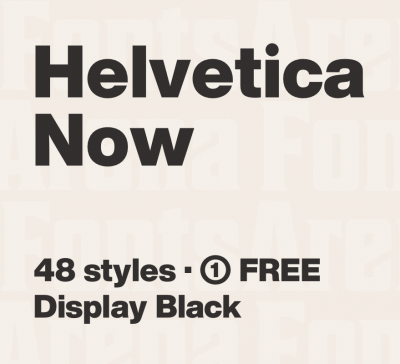

In [6]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

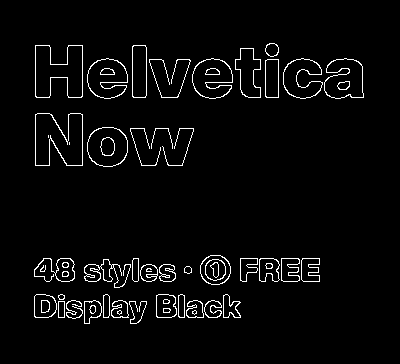

In [8]:
cv2_imshow(edges)

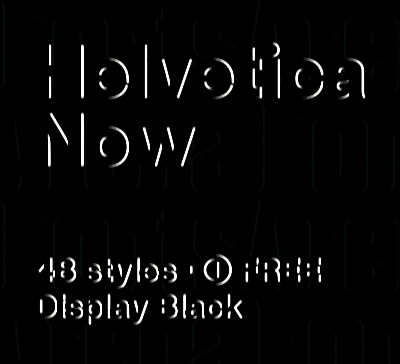

In [9]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# **Horizontal Edge Detector**

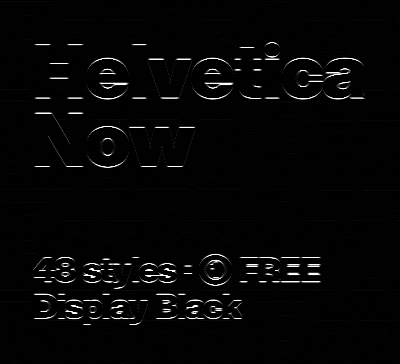

In [13]:
kernelH = np.float32([[-1,-1,-1],[2,2,2],[-1,-1,-1]])

dst = cv2.filter2D(image,-1,kernelH)
cv2_imshow(dst)

Here the kernelH has values in such a way that it magnifies the Horizontal edges(2nd row) and pushes the other edges back by having negative values in rows 1 and 2

# **45 degree angle Detector**

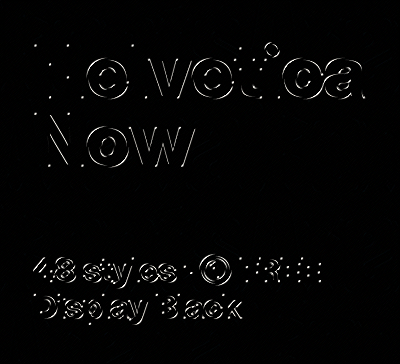

In [15]:
kernel45 = np.float32([[-1,-1, 2],[-1,2,-1],[2,-1,-1]])

dst = cv2.filter2D(image,-1,kernel45)
cv2_imshow(dst)

The kernel45 here has positive values in the secondary diagonal hence we can see the right inclined edges detected. We could see left inclined edes as well and they are not actually left inclined but small portions of right inclined edges stacked together. Even zooming in the image will not help to visualize because by default some amount anti aliasing is done by the processor these days.

# **Blur Kernel**

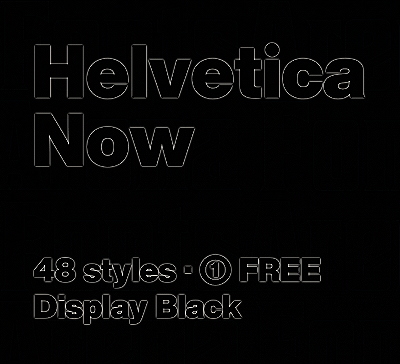

In [30]:
kernelB = np.float32([[0,-1, 0],[-1, 4, -1],[0, -1, 0]])

dst = cv2.filter2D(image,-1,kernelB)
cv2_imshow(dst)

This kernal will lur out the edges. zooming in can give some idea

# **Sharpen Kernel**

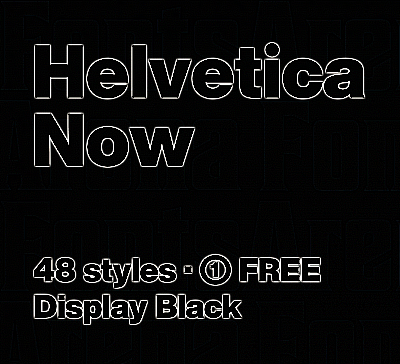

In [36]:
kernelS = np.float32([[-1,-1, -1],[-1, 8, -1],[-1, -1, -1]])

dst = cv2.filter2D(image,-1,kernelS)
cv2_imshow(dst)

The above mentioned kernelS will sharpen the edges by magnifying the middle values in the convolution

# **Identity Function**

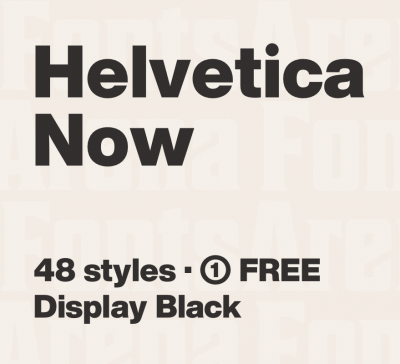

In [53]:
kernelI = np.float32([[0, 0, 0],[0, 1, 0],[0, 0, 0]])

dst = cv2.filter2D(image,-1,kernelI)
cv2_imshow(dst)

The identical kernal do nothing over the original image. It acts as a scaler multipication with a magnitude of 1.